### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [4]:
import pandas as pd

# Unificar los dataframes de las cuatro tiendas
tienda_unificada = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Calcular la facturación (Precio + Costo de envío)
tienda_unificada['Facturación'] = tienda_unificada['Precio'] + tienda_unificada['Costo de envío']

# Mostrar las primeras filas con la nueva columna
tienda_unificada.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Facturación
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,171200.0
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,200700.0
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,225500.0
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,798500.0
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,355400.0


/tmp/ipython-input-4271570567.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(tienda_unificada, x='Precio', y='Categoría del Producto', inner='box', palette='Dark2')


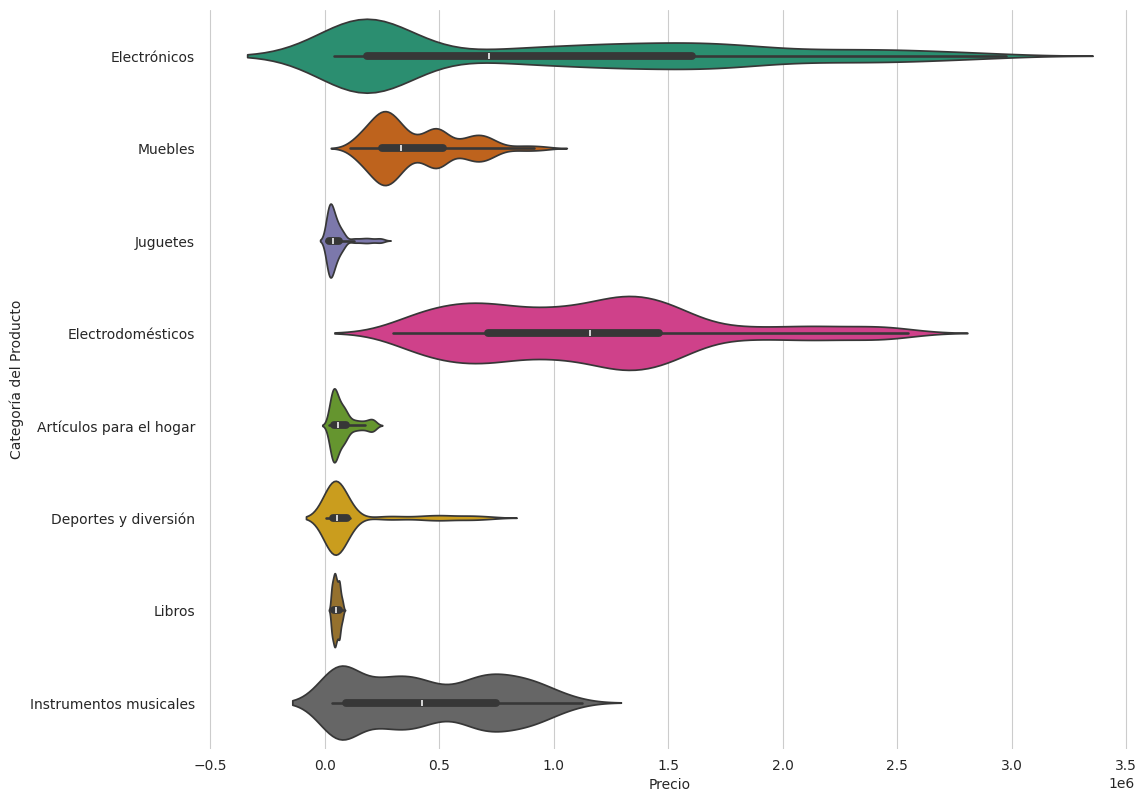

In [26]:
# @title Categoría del Producto vs Precio

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(tienda_unificada['Categoría del Producto'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(tienda_unificada, x='Precio', y='Categoría del Producto', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# 2. Ventas por categoría

In [8]:
# Calcular la facturación por categoría
facturacion_por_categoria = tienda_unificada.groupby('Categoría del Producto')['Facturación'].sum().sort_values(ascending=False)

# Mostrar la facturación por categoría
print("Facturación por categoría:")
print(facturacion_por_categoria)

Facturación por categoría:
Categoría del Producto
Electrónicos               1.749039e+09
Electrodomésticos          1.395147e+09
Muebles                    7.981114e+08
Instrumentos musicales     3.672769e+08
Deportes y diversión       1.506693e+08
Juguetes                   7.762570e+07
Artículos para el hogar    6.069090e+07
Libros                     3.975600e+07
Name: Facturación, dtype: float64


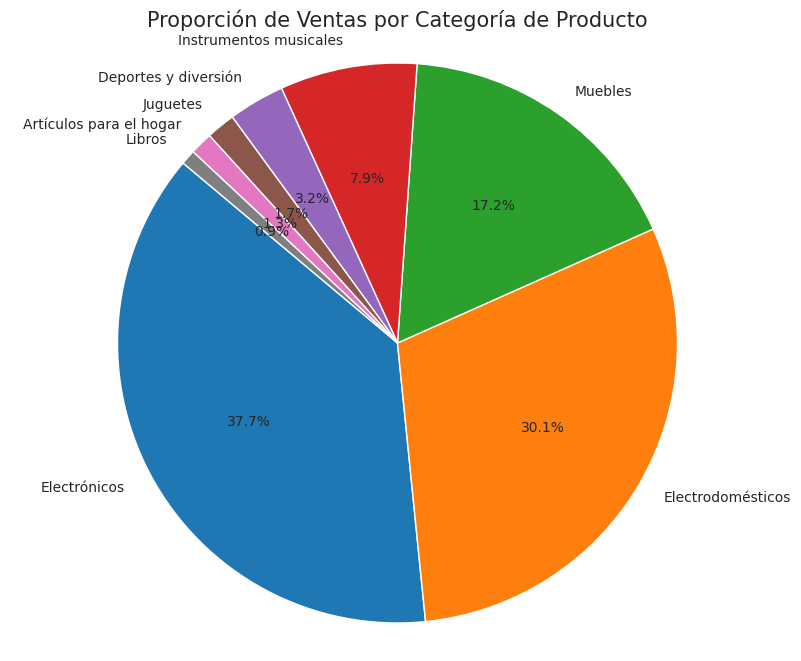

In [13]:
import matplotlib.pyplot as plt

# Crear el gráfico circular
plt.figure(figsize=(10, 8))
plt.pie(facturacion_por_categoria, labels=facturacion_por_categoria.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Ventas por Categoría de Producto', fontsize=15)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# 3. Calificación promedio de la tienda


In [20]:
# Calcular la calificación promedio por tienda
calificacion_promedio_por_tienda = tienda_unificada.groupby('Lugar de Compra')['Calificación'].mean().sort_values(ascending=False)

# Mostrar la calificación promedio por tienda
print("Calificación promedio por tienda:")
print(calificacion_promedio_por_tienda)

Calificación promedio por tienda:
Lugar de Compra
Pasto            4.148936
Bogotá           4.113619
Valledupar       4.071429
Cali             4.046673
Cartagena        4.020661
Pereira          4.013540
Bucaramanga      3.977901
Cúcuta           3.940860
Medellín         3.926534
Leticia          3.922535
Riohacha         3.895706
Soacha           3.894737
Villavicencio    3.827586
Barranquilla     3.803226
Neiva            3.800000
Inírida          3.642857
Manizales        3.634146
Santa Marta      3.596026
Armenia          3.464286
Name: Calificación, dtype: float64


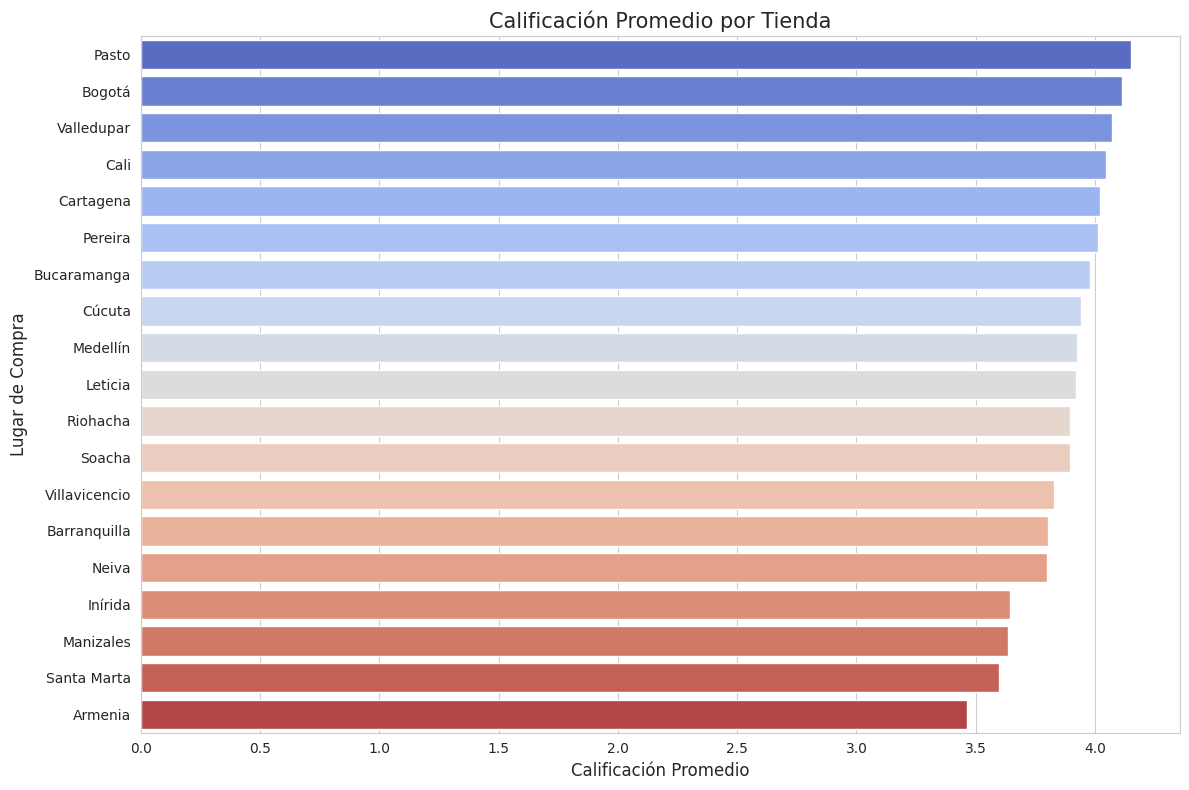

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set_style("whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(y=calificacion_promedio_por_tienda.index, x=calificacion_promedio_por_tienda.values, hue=calificacion_promedio_por_tienda.index, palette="coolwarm", legend=False)
plt.xlabel("Calificación Promedio", fontsize=12)
plt.ylabel("Lugar de Compra", fontsize=12)
plt.title("Calificación Promedio por Tienda", fontsize=15)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [22]:
# Calcular el ingreso total (Precio)
ingreso_total = tienda_unificada['Precio'].sum()
print(f"El ingreso total de la tienda es de: ${ingreso_total:,.2f}")

# Calcular el ingreso por categoría
ingreso_por_categoria = tienda_unificada.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)

# Mostrar el ingreso por categoría
print("\nIngreso por categoría:")
print(ingreso_por_categoria)

El ingreso total de la tienda es de: $4,403,619,200.00

Ingreso por categoría:
Categoría del Producto
Electrónicos               1.660576e+09
Electrodomésticos          1.324751e+09
Muebles                    7.576610e+08
Instrumentos musicales     3.487726e+08
Deportes y diversión       1.429777e+08
Juguetes                   7.360440e+07
Artículos para el hogar    5.757980e+07
Libros                     3.769610e+07
Name: Precio, dtype: float64


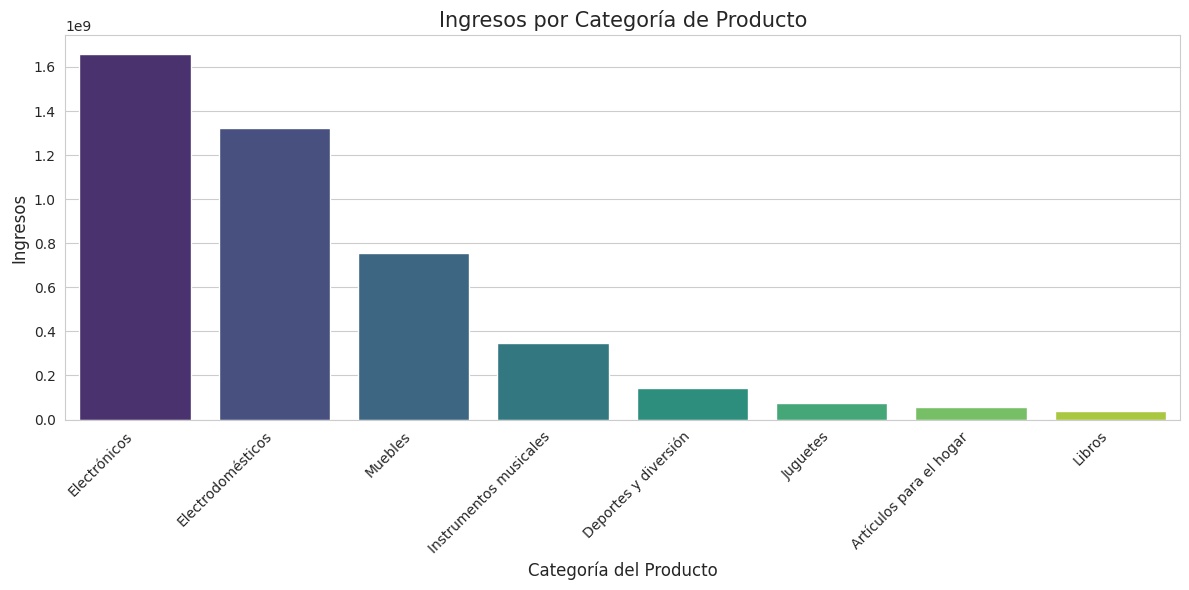

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set_style("whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=ingreso_por_categoria.index, y=ingreso_por_categoria.values, hue=ingreso_por_categoria.index, palette="viridis", legend=False)
plt.xlabel("Categoría del Producto", fontsize=12)
plt.ylabel("Ingresos", fontsize=12)
plt.title("Ingresos por Categoría de Producto", fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [23]:
# Calcular el costo de envío promedio por tienda
envio_promedio_por_tienda = tienda_unificada.groupby('Lugar de Compra')['Costo de envío'].mean().sort_values(ascending=False)

# Mostrar el costo de envío promedio por tienda
print("Costo de envío promedio por tienda:")
print(envio_promedio_por_tienda)

Costo de envío promedio por tienda:
Lugar de Compra
Soacha           34768.421053
Inírida          30557.142857
Cúcuta           28597.311828
Pasto            27801.063830
Neiva            27710.000000
Bucaramanga      26790.055249
Cali             26726.812314
Leticia          25317.605634
Medellín         25282.022472
Villavicencio    25100.000000
Manizales        24948.780488
Bogotá           24532.082171
Riohacha         24127.607362
Pereira          23211.411992
Armenia          22867.857143
Barranquilla     22692.258065
Cartagena        22638.429752
Valledupar       22021.428571
Santa Marta      18752.317881
Name: Costo de envío, dtype: float64


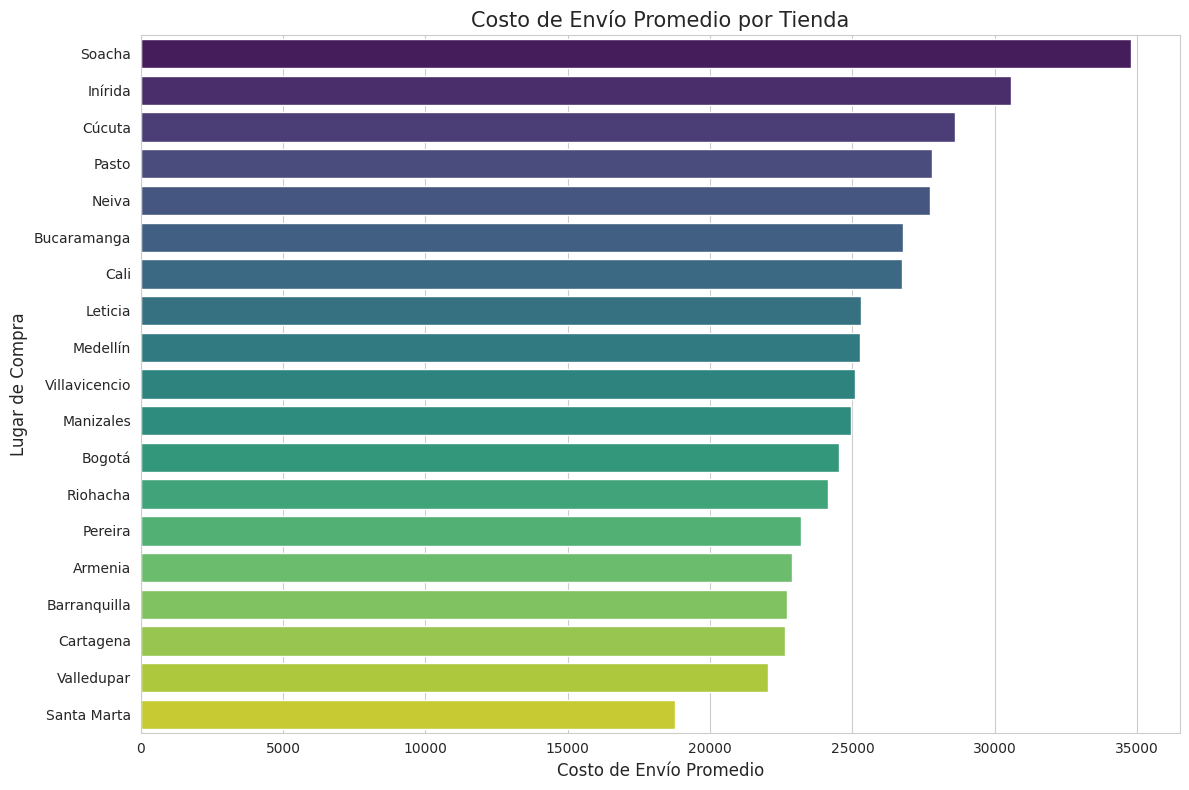

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set_style("whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(y=envio_promedio_por_tienda.index, x=envio_promedio_por_tienda.values, hue=envio_promedio_por_tienda.index, palette="viridis", legend=False)
plt.xlabel("Costo de Envío Promedio", fontsize=12)
plt.ylabel("Lugar de Compra", fontsize=12)
plt.title("Costo de Envío Promedio por Tienda", fontsize=15)
plt.tight_layout()
plt.show()

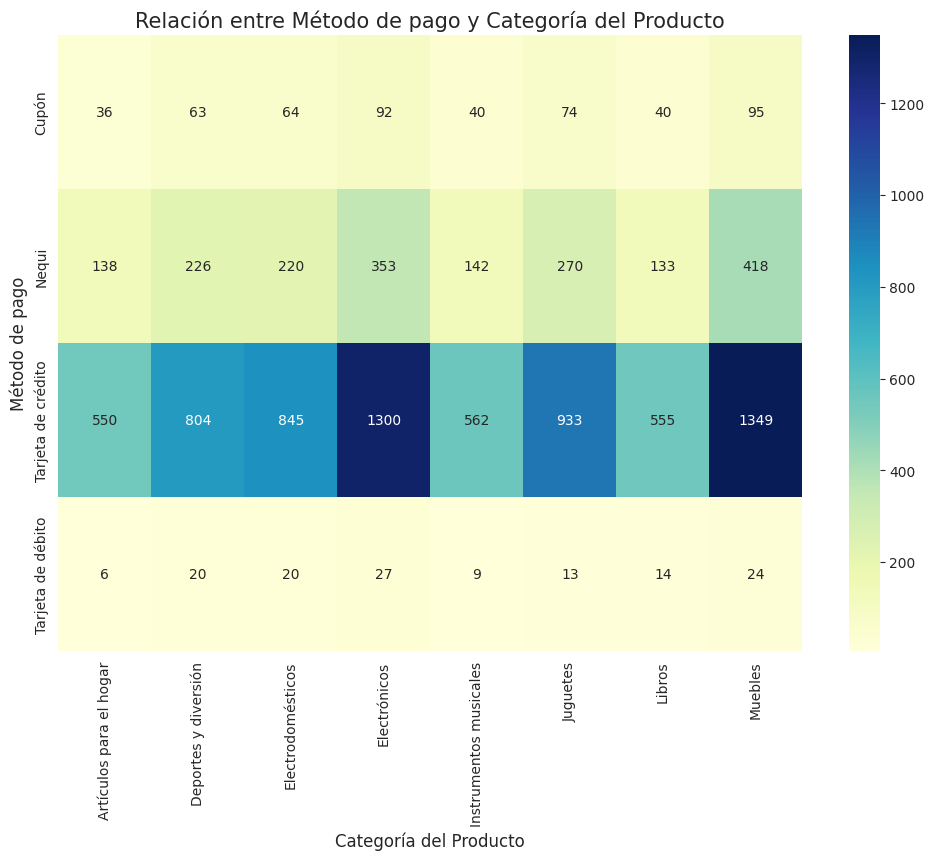

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una tabla de contingencia
contingency_table = pd.crosstab(tienda_unificada['Método de pago'], tienda_unificada['Categoría del Producto'])

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Relación entre Método de pago y Categoría del Producto', fontsize=15)
plt.xlabel('Categoría del Producto', fontsize=12)
plt.ylabel('Método de pago', fontsize=12)
plt.show()

## Recomendación para el Sr. João:

Basado en el análisis de los datos de las tiendas, la recomendación para el Sr. João es que considere vender sus productos en la tienda de **Pasto**. A continuación se detallan las razones:

### 1. Mayor Satisfacción del Cliente:
La tienda de Pasto tiene la **calificación promedio más alta** (4.15) entre todas las tiendas. Esto indica un alto nivel de satisfacción del cliente, lo que puede traducirse en una mayor lealtad y una mejor reputación, factores que son muy favorables para la venta de nuevos productos.

### 2. Costos de Envío Competitivos:
Aunque Soacha e Inírida tienen costos de envío más altos, el costo de envío promedio en Pasto es competitivo y se encuentra en el rango superior, lo que sugiere que los clientes de esta área están dispuestos a pagar por el envío, lo que puede ser beneficioso para el Sr. João.

### Conclusión:
Si bien otras ciudades como Bogotá y Medellín pueden tener un mayor volumen de ventas debido a su tamaño, la combinación de una **excelente calificación por parte de los clientes** y una **disposición a pagar costos de envío razonables** hace que la tienda de **Pasto** sea la opción más estratégica y con mayor potencial para que el Sr. João tenga éxito en la venta de sus productos.